In [1]:
import os
import sys
import glob
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)

In [2]:
from ResoFit._utilities import Layer
from ResoFit.calibration import Calibration
from ResoFit.fitresonance import FitResonance

In [3]:
%matplotlib notebook

In [4]:
# Global parameters
energy_min = 7
energy_max = 300
energy_step = 0.01

In [5]:
# Input sample name or names as str, case sensitive
layer_1 = 'U'
thickness_1 = 0.018
density_1 = None
layer_2 = 'Gd'
thickness_2 = 0.015
density_2 = None
layers = Layer()
layers.add_layer(layer=layer_1, thickness_mm=thickness_1, density_gcm3=density_1)
layers.add_layer(layer=layer_2, thickness_mm=thickness_2, density_gcm3=density_2)

In [6]:
folder = 'data/IPTS_19558/reso_data_19558'
data_file = 'spheres.csv'
spectra_file = 'Image002_Spectra.txt'
database = 'ENDF_VIII'
image_start = 300  # Can be omitted or =None
image_end = None  # Can be omitted or =None
norm_to_file = None  # 'sphere_background_1.csv'
# norm_to_file = 'sphere_background_1.csv'
baseline = True
each_step = False
baseline_deg = 3

norm_factor = 1
source_to_detector_m = 16.43  # 16#16.445359069030175#16.447496101100739
offset_us = 2.7  # 0#2.7120797253959119#2.7355447625559037

# x_type = 'lambda'
# x_type = 'energy'
x_type = 'number'
# x_type = 'time'
# y_type = 'transmission'
y_type = 'attenuation'

In [9]:
# Calibrate source_to_detector and/or delay
calibration = Calibration(data_file=data_file,
                          spectra_file=spectra_file,
                          layer=layers,
                          energy_min=energy_min,
                          energy_max=energy_max,
                          energy_step=energy_step,
                          folder=folder,
                          exp_source_to_detector_m=source_to_detector_m,
                          exp_offset_us=offset_us,
                          database=database,
                          baseline=baseline,
                          baseline_deg=baseline_deg,
                          x_type=x_type,
                          y_type=y_type
                          )

calibration.experiment.norm_to(file=norm_to_file, norm_factor=norm_factor)
calibration.experiment.slice(start=image_start, end=image_end)

calibrate_result = calibration.calibrate(source_to_detector_m=source_to_detector_m,
                                         offset_us=offset_us,
                                         vary='all',
                                         each_step=each_step)
calibration.index_peak(thres_exp=0.15, min_dist_exp=20, min_dist_map=15, thres_map=0.12, rel_tol=0.01)

+----------------- Calibration -----------------+
Params before:
Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                  2.7     -inf      inf     None     True     None     None
source_to_detector_m     16.43     -inf      inf     None     True     None     None

Params after:
Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                2.707     -inf      inf 0.007068     True     None     None
source_to_detector_m     16.43     -inf      inf 0.0007906     True     None     None
Calibration chi^2 : 14.32337574619115



/Users/y9z/anaconda3/envs/py37/lib/python3.7/site-packages/peakutils/peak.py:246: UserWarning:

At least 3 points required for Gaussian fitting



In [10]:
calibration.analyze_peak(report=False, fit_model='Lorentzian')  # ['Gaussian', 'Lorentzian']

+------------ Peak analysis ------------+
Lorentzian peak fitting:
  ele_name   center_val   fwhm_val
0        U   516.261191   3.037647
1        U   663.778653   3.395883
2        U   710.172239   3.530453
3        U   890.721693   4.020460
4        U  1202.878333   7.292614
5       Gd  1548.923366  12.148991
6        U  1602.526531  12.171793
7       Gd  1789.317995  30.861473



<IPython.core.display.Javascript object>


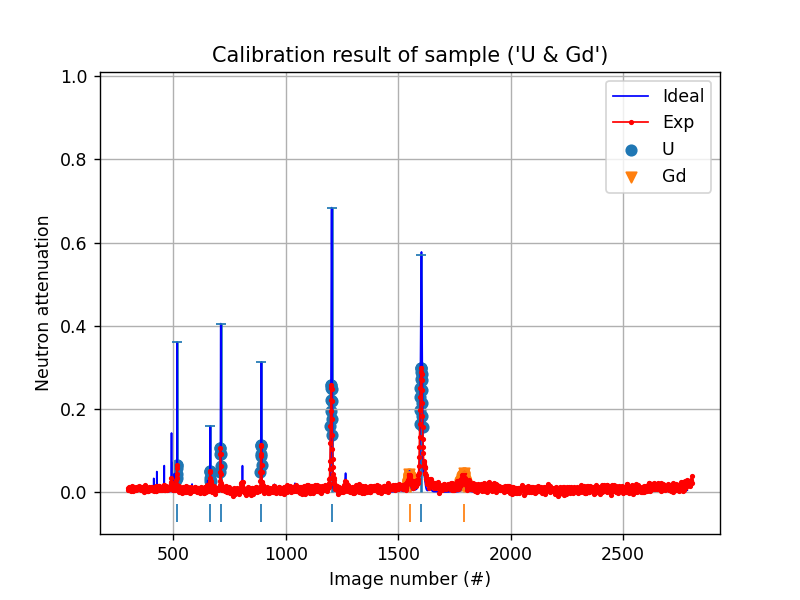

In [11]:
calibration.plot(y_type=y_type,
                 x_type=x_type,
                 # t_unit='ns',
                 # before=True,
                 # interp=True,
                 mixed=True,
                 table=False,
                 peak_exp='indexed',
                 peak_height=True,
                 index_level='ele',
                 # peak_id='all',
                 logx=False,
                 )

In [14]:
u_num = list(calibration.experiment.o_peak.peak_map_indexed_dict['peak_map_indexed'][layer_1]['peak_span']['x_num'])
print(u_num)

[514, 515, 516, 517, 518, 662, 663, 664, 665, 666, 708, 709, 710, 711, 712, 888, 889, 890, 891, 892, 893, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609]


In [15]:
gd_num = list(calibration.experiment.o_peak.peak_map_indexed_dict['peak_map_indexed'][layer_2]['peak_span']['x_num'])
print(gd_num)

[1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805]


In [17]:
def fill_zeros_to_num_str(num_str, tot_digits=5):
    while len(num_str)<tot_digits:
        num_str = '0' + num_str
    return num_str
    

In [18]:
gd_num_str_list =[fill_zeros_to_num_str(num_str) for num_str in list(map(str, gd_num))]
print(gd_num_str_list)
print(len(gd_num_str_list))

['01542', '01543', '01544', '01545', '01546', '01547', '01548', '01549', '01550', '01551', '01552', '01553', '01554', '01555', '01773', '01774', '01775', '01776', '01777', '01778', '01779', '01780', '01781', '01782', '01783', '01784', '01785', '01786', '01787', '01788', '01789', '01790', '01791', '01792', '01793', '01794', '01795', '01796', '01797', '01798', '01799', '01800', '01801', '01802', '01803', '01804', '01805']
47


In [19]:
u_num_str_list =[fill_zeros_to_num_str(num_str) for num_str in list(map(str, u_num))]
print(u_num_str_list)
print(len(u_num_str_list))

['00514', '00515', '00516', '00517', '00518', '00662', '00663', '00664', '00665', '00666', '00708', '00709', '00710', '00711', '00712', '00888', '00889', '00890', '00891', '00892', '00893', '01199', '01200', '01201', '01202', '01203', '01204', '01205', '01206', '01207', '01596', '01597', '01598', '01599', '01600', '01601', '01602', '01603', '01604', '01605', '01606', '01607', '01608', '01609']
44


In [62]:
dst_dir = '/Users/y9z/Downloads/test'
if os.path.exists(dst_dir) is False:
    os.makedirs(dst_dir)

In [67]:
os.path.isdir(dst_dir)

True

In [68]:
_list_files = glob.glob('/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/*.fits')

In [69]:
_list_files

['/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00000.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00001.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00002.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00003.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00004.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00005.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00006.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00007.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00008

In [70]:
_list_short_files = [os.path.basename(_file) for _file in _list_files]

In [18]:
_list_short_files

['Image010_00000.fits',
 'Image010_00001.fits',
 'Image010_00002.fits',
 'Image010_00003.fits',
 'Image010_00004.fits',
 'Image010_00005.fits',
 'Image010_00006.fits',
 'Image010_00007.fits',
 'Image010_00008.fits',
 'Image010_00009.fits',
 'Image010_00010.fits',
 'Image010_00011.fits',
 'Image010_00012.fits',
 'Image010_00013.fits',
 'Image010_00014.fits',
 'Image010_00015.fits',
 'Image010_00016.fits',
 'Image010_00017.fits',
 'Image010_00018.fits',
 'Image010_00019.fits',
 'Image010_00020.fits',
 'Image010_00021.fits',
 'Image010_00022.fits',
 'Image010_00023.fits',
 'Image010_00024.fits',
 'Image010_00025.fits',
 'Image010_00026.fits',
 'Image010_00027.fits',
 'Image010_00028.fits',
 'Image010_00029.fits',
 'Image010_00030.fits',
 'Image010_00031.fits',
 'Image010_00032.fits',
 'Image010_00033.fits',
 'Image010_00034.fits',
 'Image010_00035.fits',
 'Image010_00036.fits',
 'Image010_00037.fits',
 'Image010_00038.fits',
 'Image010_00039.fits',
 'Image010_00040.fits',
 'Image010_00041

In [47]:
_list_names = [_name.split('.')[0] for _name in _list_files]

In [71]:
_loc_list = []
for _names in _list_files:
    _base_name = _names.split('.')[0]
    if _base_name[-5:] in gd_num_str_list:
        _loc_list.append(_names)
        

In [72]:
_loc_list

['/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00489.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00490.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00491.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00492.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00493.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00494.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_01545.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_01546.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_01547

In [19]:
_list_element = set([_name.split('_')[0].lower() for _name in _list_short_files])

In [20]:
_list_element

{'image010'}

In [51]:
set([_name.split('.')[1] for _name in _list_short_files])

{'fits'}

In [49]:
_list_fname=set([_name.split('_')[0] for _name in _list_short_files])

In [50]:
_list_fname

{'Image000',
 'Image001',
 'Image002',
 'Image003',
 'Image004',
 'Image005',
 'Image006',
 'Image007',
 'Image008',
 'Image009',
 'Image010',
 'Image011',
 'Image012',
 'Image013',
 'Image014',
 'Image015',
 'Image016',
 'Image017',
 'Image018',
 'Image019',
 'Image020',
 'Image021',
 'Image022',
 'Image023',
 'Image024',
 'Image025',
 'Image026',
 'Image027',
 'Image028',
 'Image029',
 'Image030',
 'Image031',
 'Image032',
 'Image033',
 'Image034',
 'Image035'}

In [100]:
file_name_list_peak = []
new_loc = []
_image_num = 'Image010'
# for _image_num in _list_fname:
for _index in num_str_list:
    _full_name = '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/' + _image_num + '_' + _index + '.fits'
    _loc_name = '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/Gd/redo/' + _image_num + '_' + _index + '.fits'
    file_name_list_peak.append(_full_name)
    new_loc.append(_loc_name)


In [82]:
len(file_name_list_peak)/36 == len(num_str_list)

False

In [96]:
file_name_list_peak


['/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image12/Image012_00489.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image12/Image012_00490.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image12/Image012_00491.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image12/Image012_00492.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image12/Image012_00493.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image12/Image012_00494.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image12/Image012_01545.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image12/Image012_01546.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image12/Image012_01547

In [88]:
new_loc

['/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/U/redo/Image011_00514.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/U/redo/Image011_00515.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/U/redo/Image011_00516.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/U/redo/Image011_00517.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/U/redo/Image011_00518.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/U/redo/Image011_00661.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/U/redo/Image011_00662.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/U/redo/Image011_00663.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/U/redo/Image011_00664.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/U/redo/Image011_00665.fits',
 '/Users/y

In [57]:
from shutil import copyfile


In [101]:
for i in range(len(new_loc)):
    copyfile(src=file_name_list_peak[i], dst=new_loc[i])

In [29]:
_list_element

{'image000',
 'image001',
 'image002',
 'image003',
 'image004',
 'image005',
 'image006',
 'image007',
 'image008',
 'image009',
 'image010',
 'image011',
 'image012',
 'image013',
 'image014',
 'image015',
 'image016',
 'image017',
 'image018',
 'image019',
 'image020',
 'image021',
 'image022',
 'image023',
 'image024',
 'image025',
 'image026',
 'image027',
 'image028',
 'image029',
 'image030',
 'image031',
 'image032',
 'image033',
 'image034',
 'image035'}